In [24]:
import os
import json
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [25]:
data_dir = os.path.join(os.getcwd(), 'simulation_results')

##### Task 1.1

In [26]:
scenarios = ['clear-night', 'clear-noon', 'clear-sunset', 'haze-noon', 'haze-sunset', 'rain-noon']
csvs = ['ctl', 'cvip', 'traj']

In [27]:
all_data = []
dfs = {}
for folder in os.listdir(data_dir):
    folder_path = os.path.join(data_dir, folder)
    if os.path.isdir(folder_path):
        for scenario in scenarios:
            if scenario in folder:
                folder = scenario
                break

        for file in os.listdir(folder_path):
            if file.endswith('.csv'):
                file_path = os.path.join(folder_path, file)
                df = pd.read_csv(file_path)
                for csv_type in csvs:
                    if csv_type in file:
                        file = csv_type
                        break
                all_data.append((folder, file, df))
                key = f"{folder}_{file}"
                dfs[key] = df

for i, (folder, file, df) in enumerate(all_data):
    print(f"Data from folder '{folder}', file '{file}':\n", df.head(), "\n")
    print("="*50)

Data from folder 'clear-night', file 'ctl':
       ts  agent_id  throttle     steer  brake
0  22555         0       0.9 -0.012952    0.0
1  22556         0       0.9 -0.003071    0.0
2  22557         0       0.9 -0.010238    0.0
3  22558         0       0.9 -0.008100    0.0
4  22559         0       0.9 -0.000104    0.0 

Data from folder 'clear-night', file 'cvip':
       ts  agent_id        cvip      cvip_x     cvip_y      cvip_z
0  22555         0  500.491189  198.767441 -95.832657 -499.819366
1  22556         0    5.595580  195.567444 -90.832657    0.100000
2  22557         0    5.592365  195.567444 -90.832657    0.095407
3  22558         0    5.589578  195.567444 -90.832657    0.084691
4  22559         0    5.587154  195.567444 -90.832657    0.069311 

Data from folder 'clear-night', file 'traj':
       ts  agent_id           x         y         z    v
0  22555         0  192.362411 -86.26268  0.539326  0.0
1  22556         0  192.362411 -86.26268  0.491906  0.0
2  22557         0 

In [28]:
# List the first 5 rows of the ctl.csv, cvip.csv, and traj.csv with the clear-night weather condition.
scenario = 'clear-night'

for file_type in csvs:
    key = f"{scenario}_{file_type}"
    df = dfs.get(key)
    if df is not None:
        # print(df['agent_id'].nunique())
        print(f"Data from '{key}':\n", df.head())

Data from 'clear-night_ctl':
       ts  agent_id  throttle     steer  brake
0  22555         0       0.9 -0.012952    0.0
1  22556         0       0.9 -0.003071    0.0
2  22557         0       0.9 -0.010238    0.0
3  22558         0       0.9 -0.008100    0.0
4  22559         0       0.9 -0.000104    0.0
Data from 'clear-night_cvip':
       ts  agent_id        cvip      cvip_x     cvip_y      cvip_z
0  22555         0  500.491189  198.767441 -95.832657 -499.819366
1  22556         0    5.595580  195.567444 -90.832657    0.100000
2  22557         0    5.592365  195.567444 -90.832657    0.095407
3  22558         0    5.589578  195.567444 -90.832657    0.084691
4  22559         0    5.587154  195.567444 -90.832657    0.069311
Data from 'clear-night_traj':
       ts  agent_id           x         y         z    v
0  22555         0  192.362411 -86.26268  0.539326  0.0
1  22556         0  192.362411 -86.26268  0.491906  0.0
2  22557         0  192.362411 -86.26268  0.438374  0.0
3  22558    

##### Task1.2

In [29]:
# a. The duration of the scene
duration = 0
for scenario in scenarios:
    for file_type in csvs:
        key = f"{scenario}_{file_type}"
        df = dfs.get(key)
        if df is not None:
            start_time = df['ts'].min()
            end_time = df['ts'].max()
            duration = end_time - start_time

    print(f"Scene '{scenario}'")
    print(f"The duration of the scene: {duration} fps")
    print("="*50)

Scene 'clear-night'
The duration of the scene: 859 fps
Scene 'clear-noon'
The duration of the scene: 752 fps
Scene 'clear-sunset'
The duration of the scene: 756 fps
Scene 'haze-noon'
The duration of the scene: 755 fps
Scene 'haze-sunset'
The duration of the scene: 756 fps
Scene 'rain-noon'
The duration of the scene: 401 fps


b. Mean and standard deviation of the values of the features

In [30]:
features = ['throttle', 'steer', 'brake', 'cvip', 'x', 'y', 'v']
results_df = pd.DataFrame(index=features)

for scenario in scenarios:
    mean_std_values = {}
    for file_type in csvs:
        key = f"{scenario}_{file_type}" 
        df = dfs.get(key) 
        if df is not None:
            for feature in features:
                if feature in df.columns:
                    mean_value = df[feature].mean()
                    std_value = df[feature].std()
                    mean_std_values[feature] = f"{mean_value:.3f} ({std_value:.3f})"

    if mean_std_values:
        results_df[scenario] = pd.Series(mean_std_values)

results_df

,clear-night,clear-noon,clear-sunset,haze-noon,haze-sunset,rain-noon
throttle,0.586 (0.357),0.609 (0.282),0.611 (0.281),0.601 (0.298),0.603 (0.298),0.647 (0.272)
steer,0.004 (0.060),0.001 (0.005),0.000 (0.005),0.001 (0.005),0.001 (0.005),-0.000 (0.003)
brake,0.138 (0.345),0.061 (0.240),0.057 (0.232),0.060 (0.237),0.052 (0.221),0.037 (0.190)
cvip,33.425 (33.532),19.533 (24.277),20.055 (24.638),20.209 (24.276),20.144 (24.345),7.050 (24.704)
x,191.533 (1.127),192.920 (0.403),192.946 (0.401),192.941 (0.411),192.942 (0.411),192.631 (0.251)
y,-29.854 (39.593),-31.341 (40.553),-31.218 (40.408),-31.827 (40.657),-31.566 (40.665),-63.877 (21.147)
v,6.074 (2.690),6.927 (3.283),6.884 (3.315),6.891 (3.062),6.887 (3.055),6.357 (3.873)


In [31]:
results_df.to_excel('df.xlsx', index=True)

##### Task 1.3

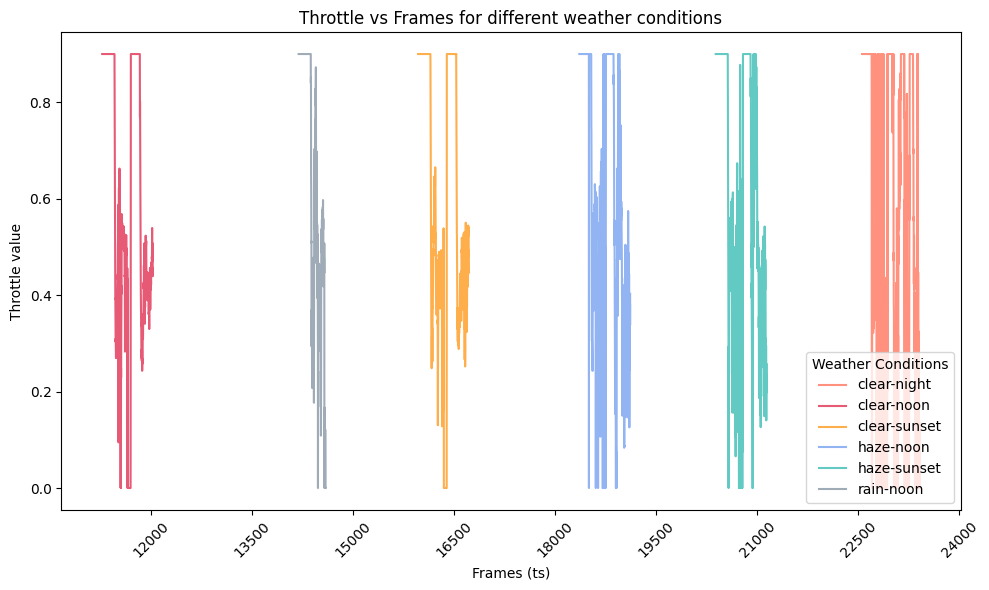

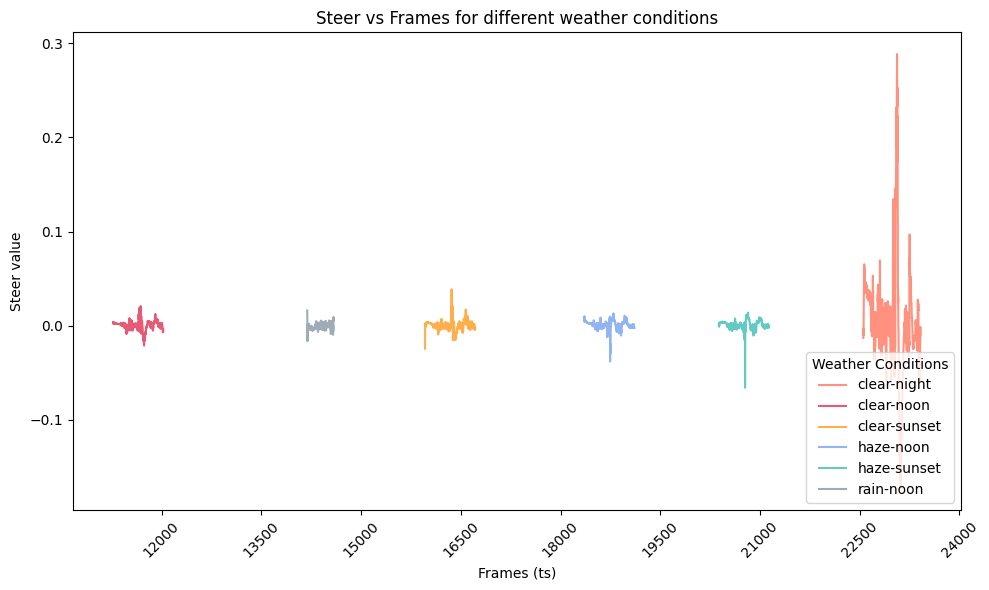

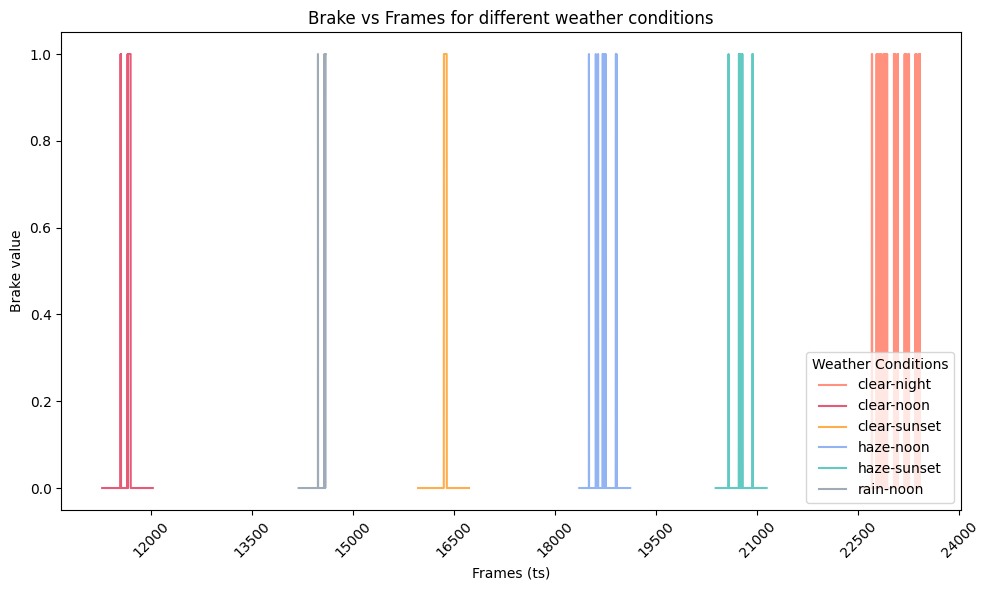

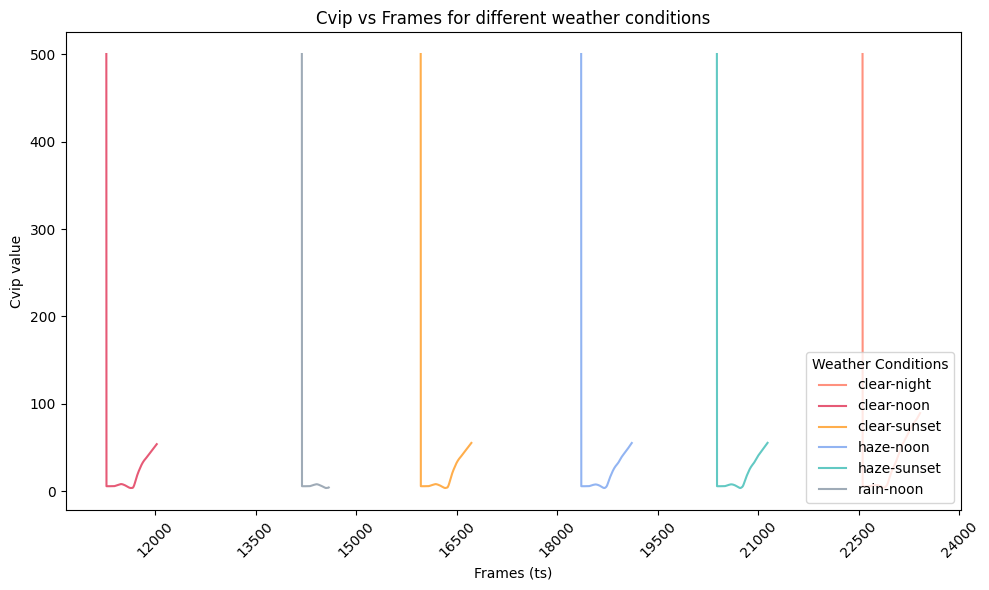

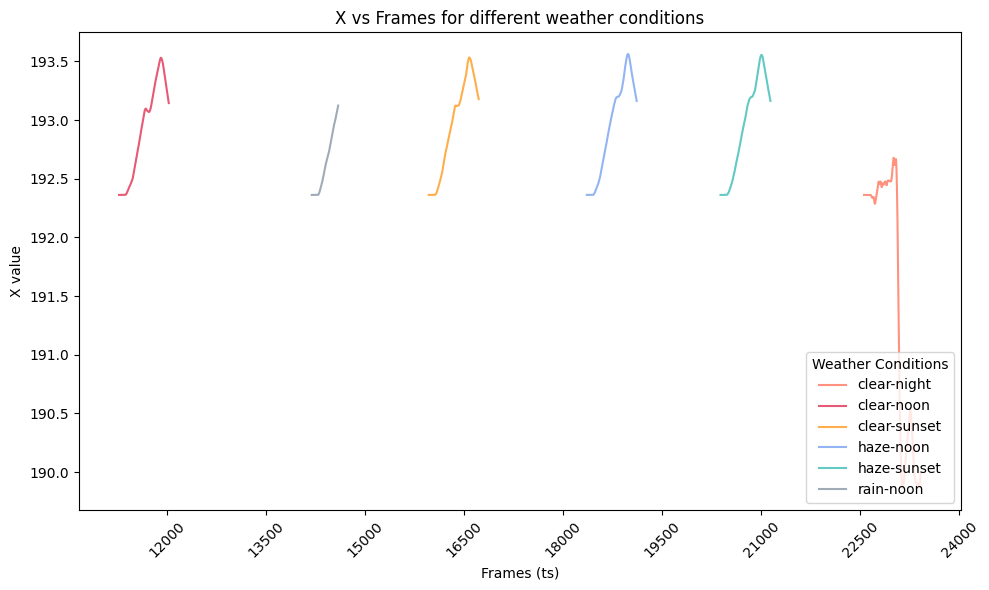

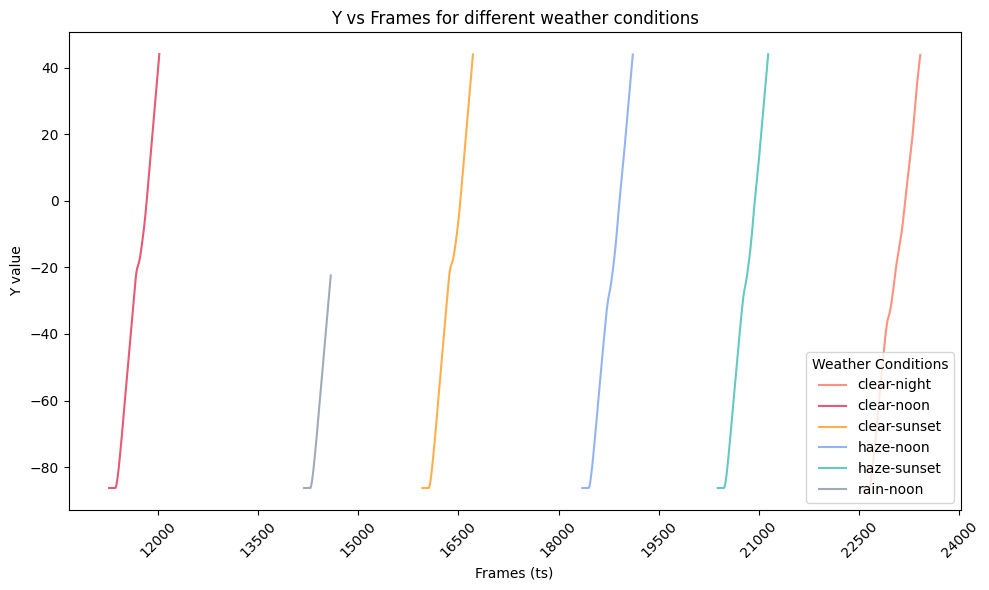

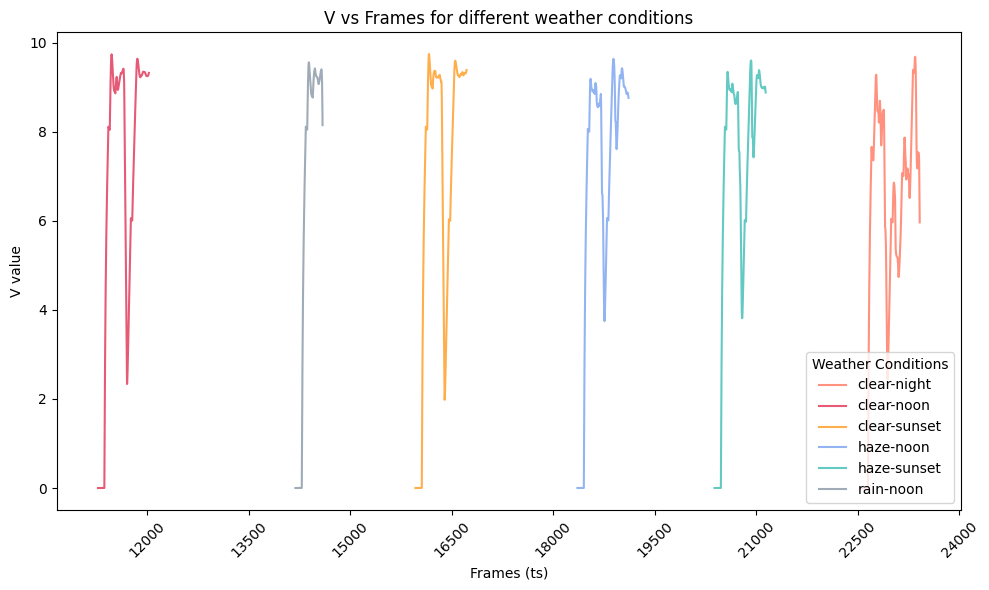

In [32]:
# colors, matching with scenarios
colors = ['tomato', 'crimson', 'darkorange', 'cornflowerblue', 'lightseagreen', 'lightslategrey']

for feature in features:
    plt.figure(figsize=(10, 6))
    plt.title(f"{feature.capitalize()} vs Frames for different weather conditions")
    plt.xlabel("Frames (ts)")  
    plt.ylabel(f"{feature.capitalize()} value")

    for i, (scenario, color) in enumerate(zip(scenarios, colors)):
        df = None
        for file_type in csvs:
            key = f"{scenario}_{file_type}"
            df = dfs.get(key)
            if df is not None and feature in df.columns:
                df['ts'] = df['ts'].astype(float) 
                plt.plot(df['ts'], df[feature], label=scenario, color=color, alpha=0.7)

    plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True)) 
    plt.xticks(rotation=45)
    plt.legend(title="Weather Conditions", loc='lower right')
    plt.tight_layout()  
    plt.show()

##### Task 1.4

##### Based on your intuition and life experience, which of the features do you think will change during an accident? How will the feature(s) change? 
1. `Throttle`: The throttle may decrease sharply just before the accident, as drivers usually slow down or stop when sensing a collision is imminent.
2. `Brake`: The brake input may increase dramatically during an accident, indicating the driver’s attempt to stop the vehicle.
3. `Steering`: The steering may show rapid changes during an accident, as the driver might try to swerve to avoid an object or another vehicle.
4. `Speed(v)`: Speed will typically decrease and may even reach zero as the vehicle comes to a stop due to the accident.
5. `Distance to other objects(cvip)`: The distance between the vehicle and other vehicles or objects will decrease rapidly as the accident approaches.
6. `x(horizontal direction)`: If the driver or the autonomous system attempts to swerve before the accident, x may undergo rapid changes.
7. `y(driving direction)`: If the vehicle decelerates or stops before the accident, y will gradually decrease and may eventually approach zero.

##### By looking at the plots you generated in Task 1.3, which weather condition(s) has an accident? 
Based on the observations: 
1. The brake value(brake=1) remains at 1, indicating the vehicle applied full braking. 
2. The speed(v) drops and does not increase again, suggesting the vehicle may have come to a stop.
3. The cvip value equals 0, meaning the distance between the vehicle and another object or vehicle is zero, implying a collision.

From these points, it can be inferred that an accident occurred under the **`rain-noon`** weather condition.

##### Task1.3 plot time as an ordinal variable(additional)

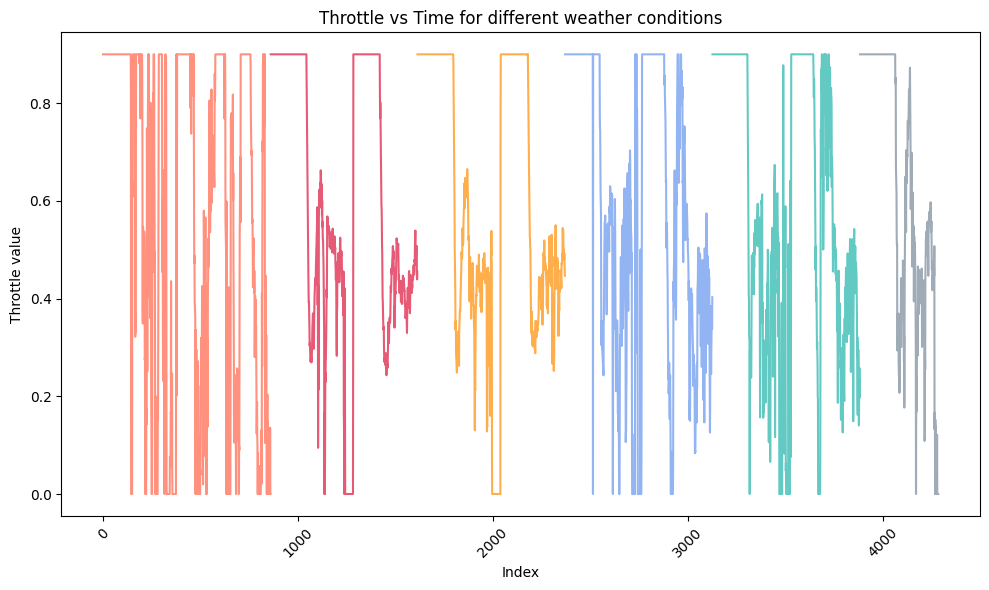

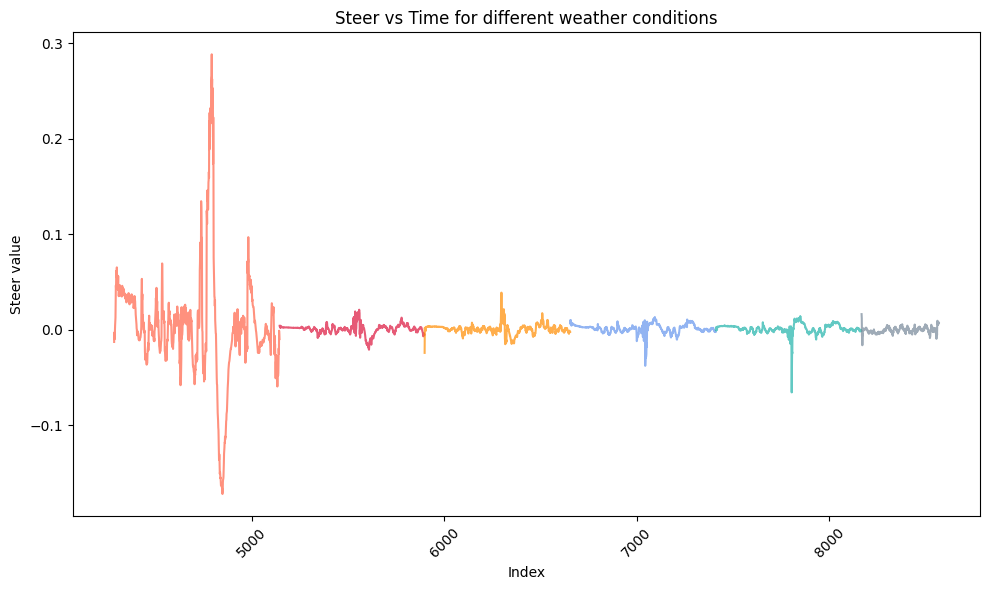

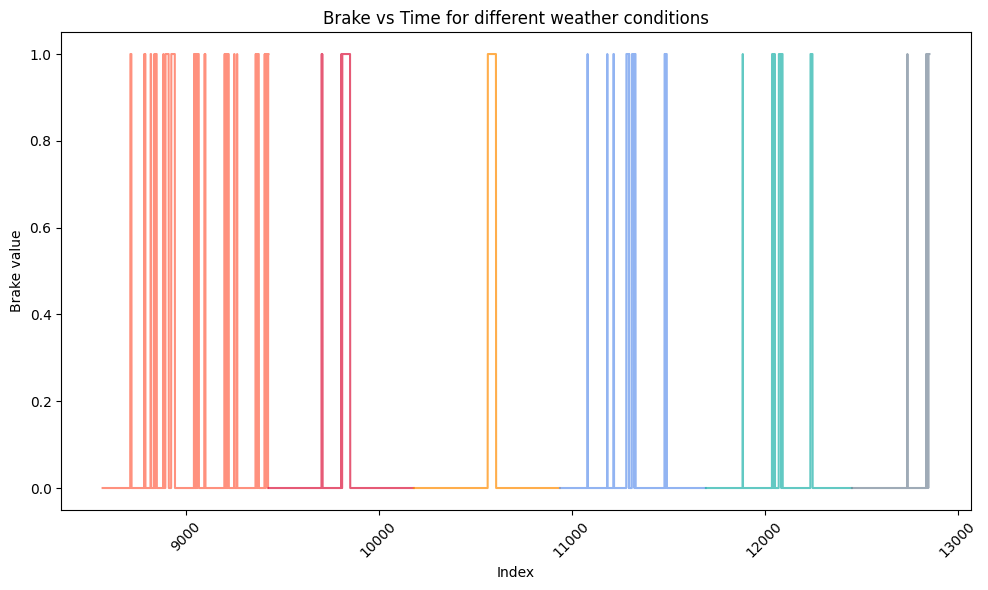

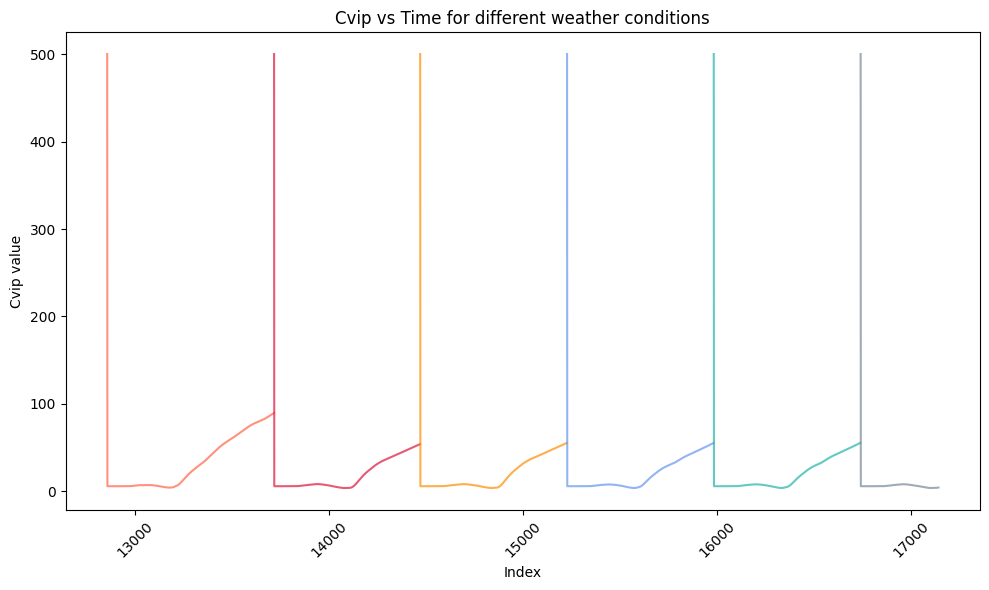

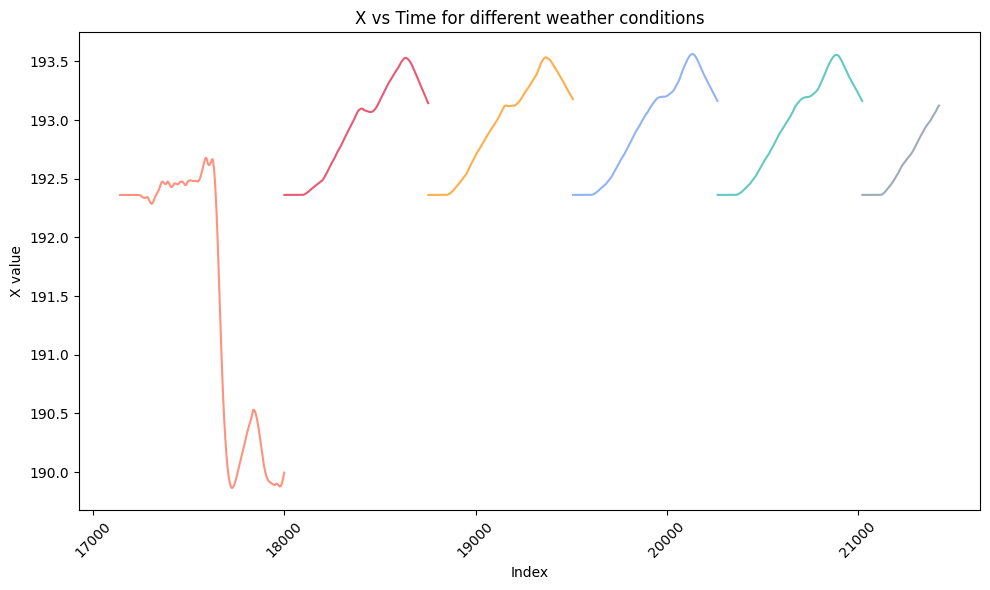

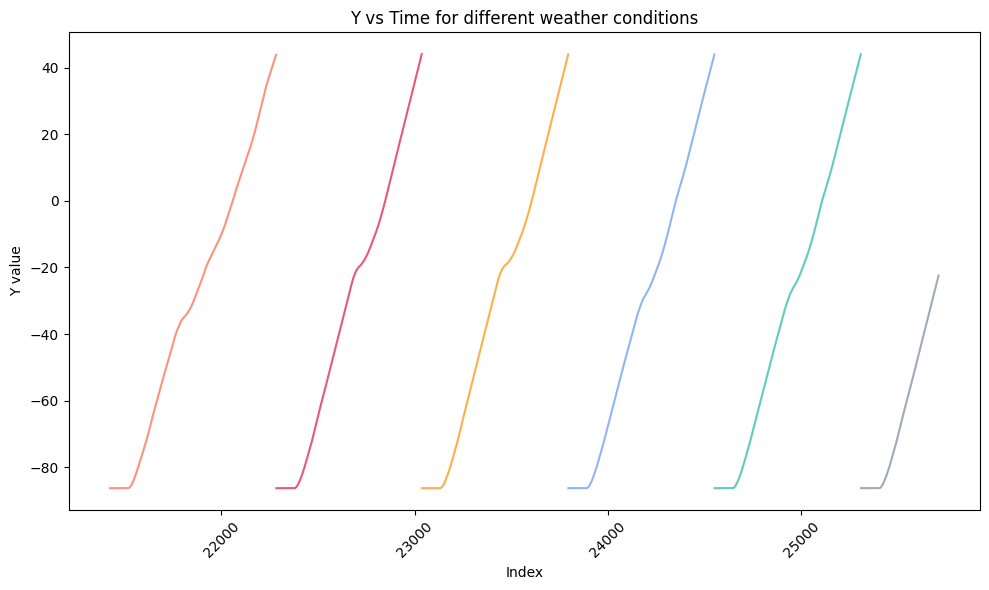

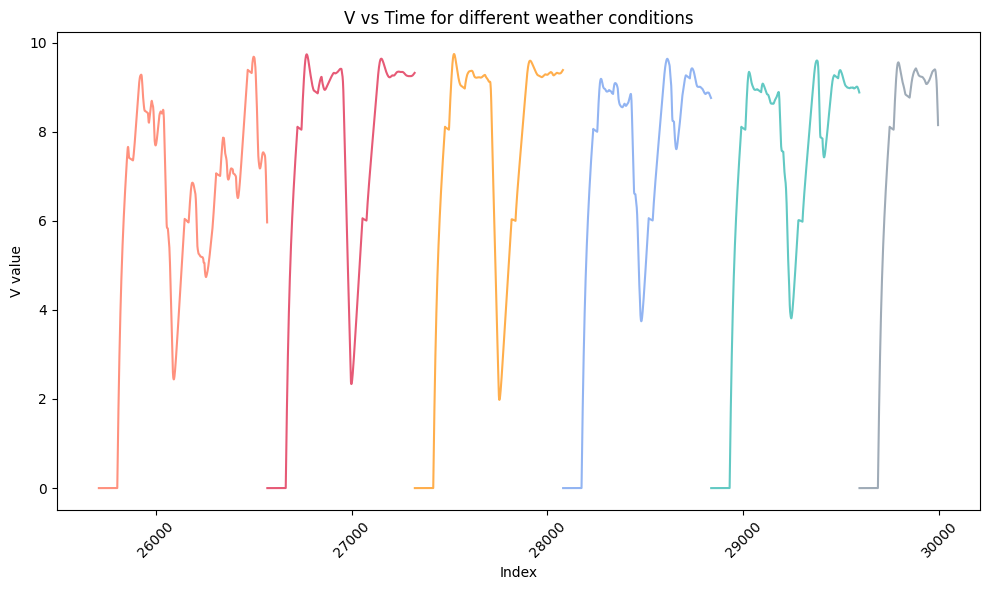

In [33]:
offset = 0  

for feature in features:
    plt.figure(figsize=(10, 6)) 
    plt.title(f"{feature.capitalize()} vs Time for different weather conditions")
    plt.xlabel("Index")
    plt.ylabel(f"{feature.capitalize()} value")

    for i, (scenario, color) in enumerate(zip(scenarios, colors)):
        df = None 
        for file_type in csvs:
            key = f"{scenario}_{file_type}"  
            df = dfs.get(key) 
            if df is not None and feature in df.columns:
                plt.plot(df.index + offset, df[feature], label=scenario, color=color, alpha=0.7)
                offset += len(df)

    plt.xticks(rotation=45)  
    # plt.legend(title="Weather Conditions", loc='lower right')
    plt.tight_layout()  
    plt.show()

##### Task1.3 subplot(additional)

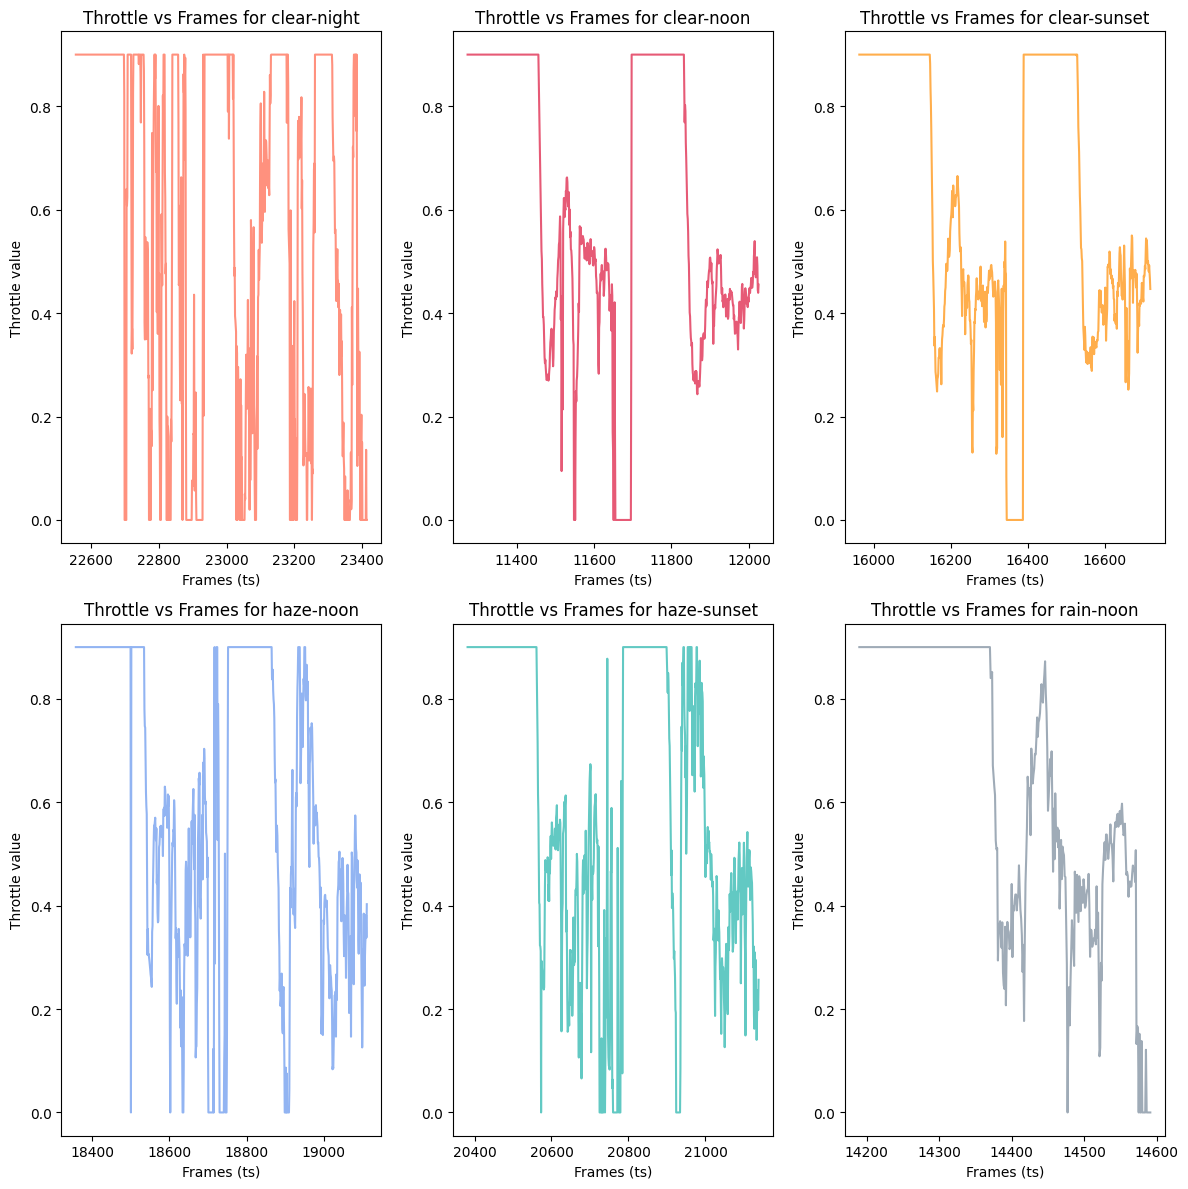

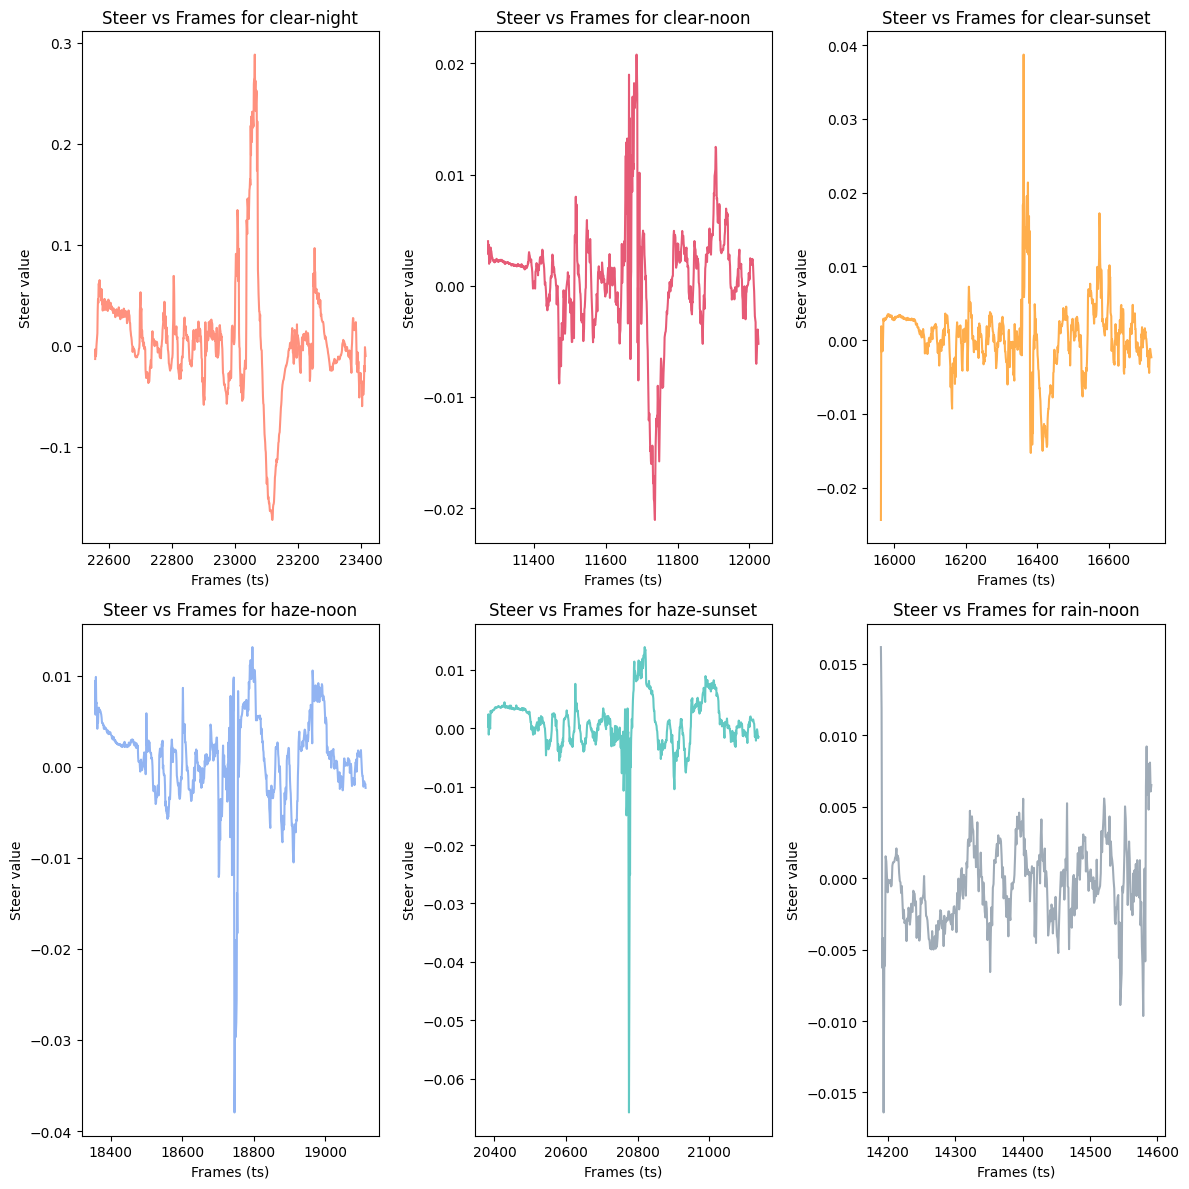

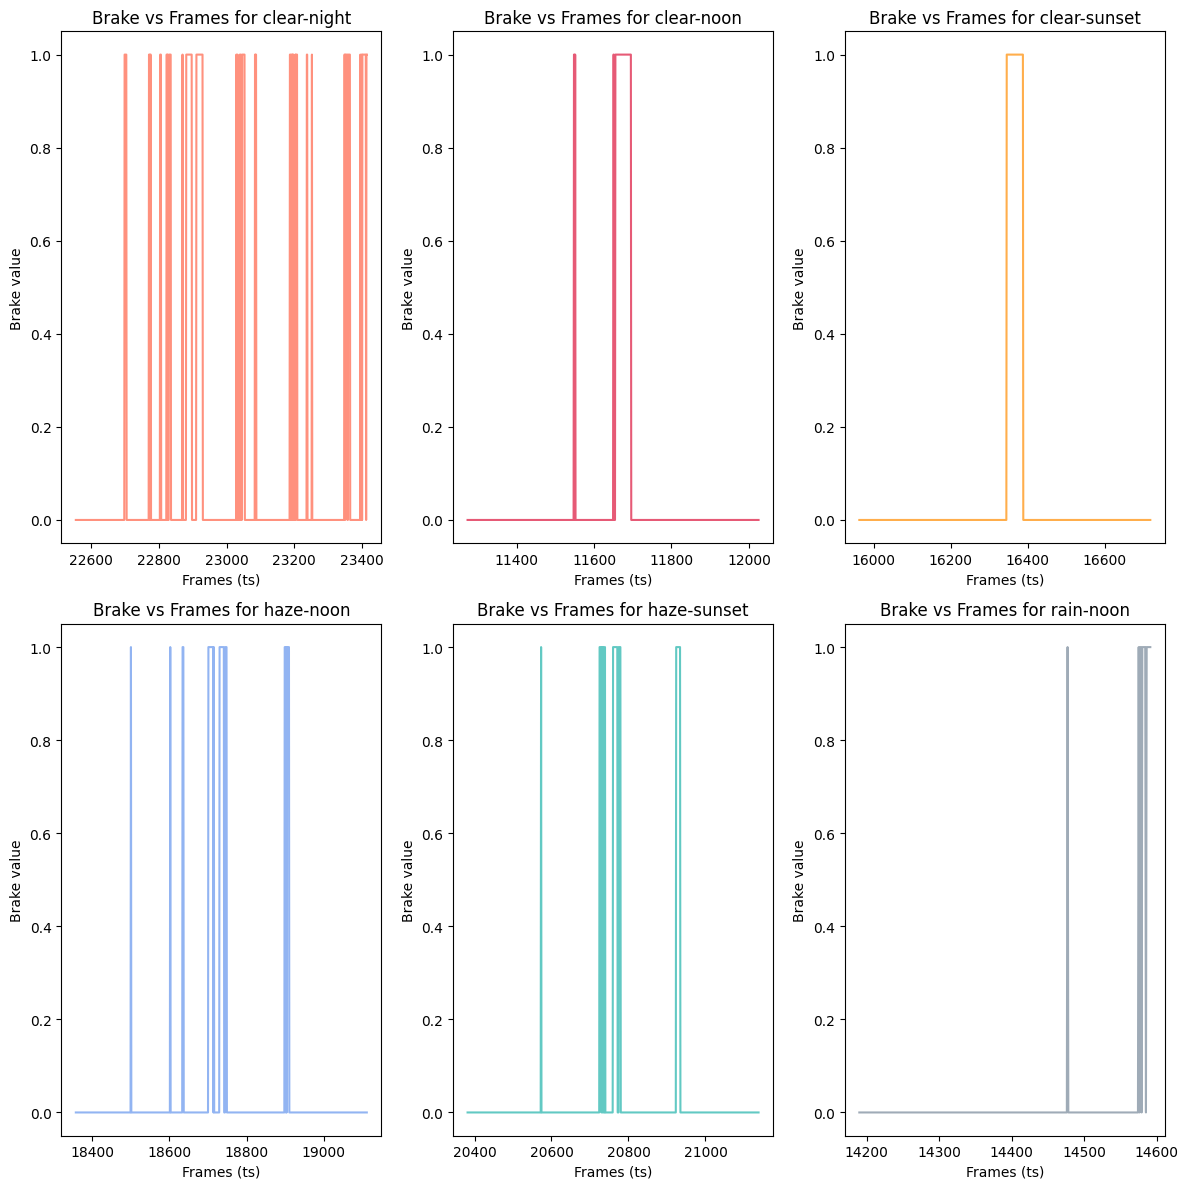

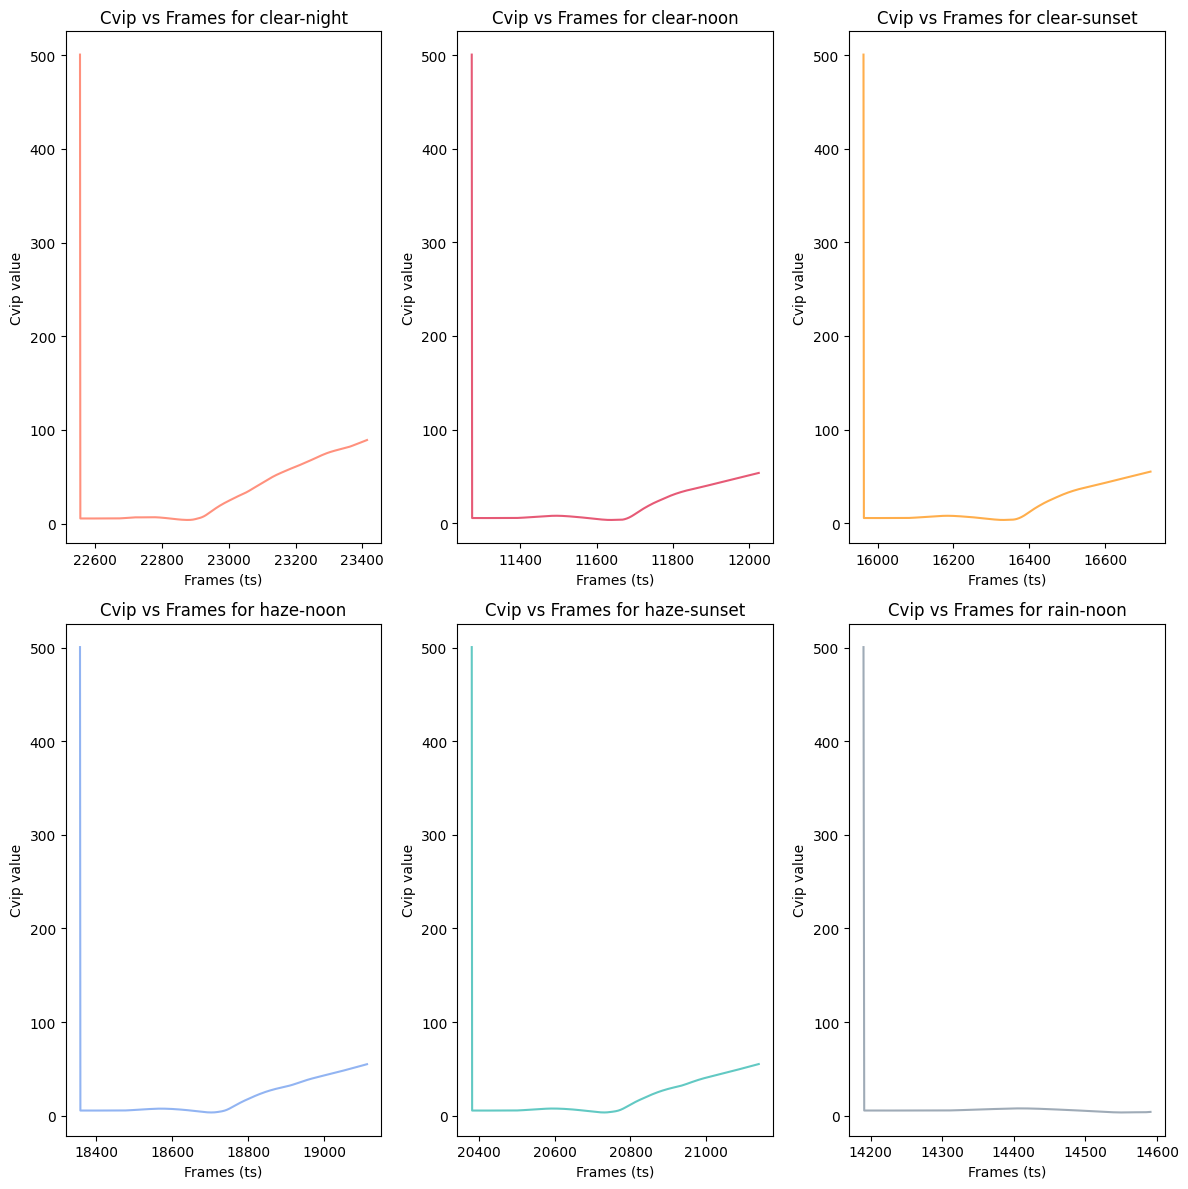

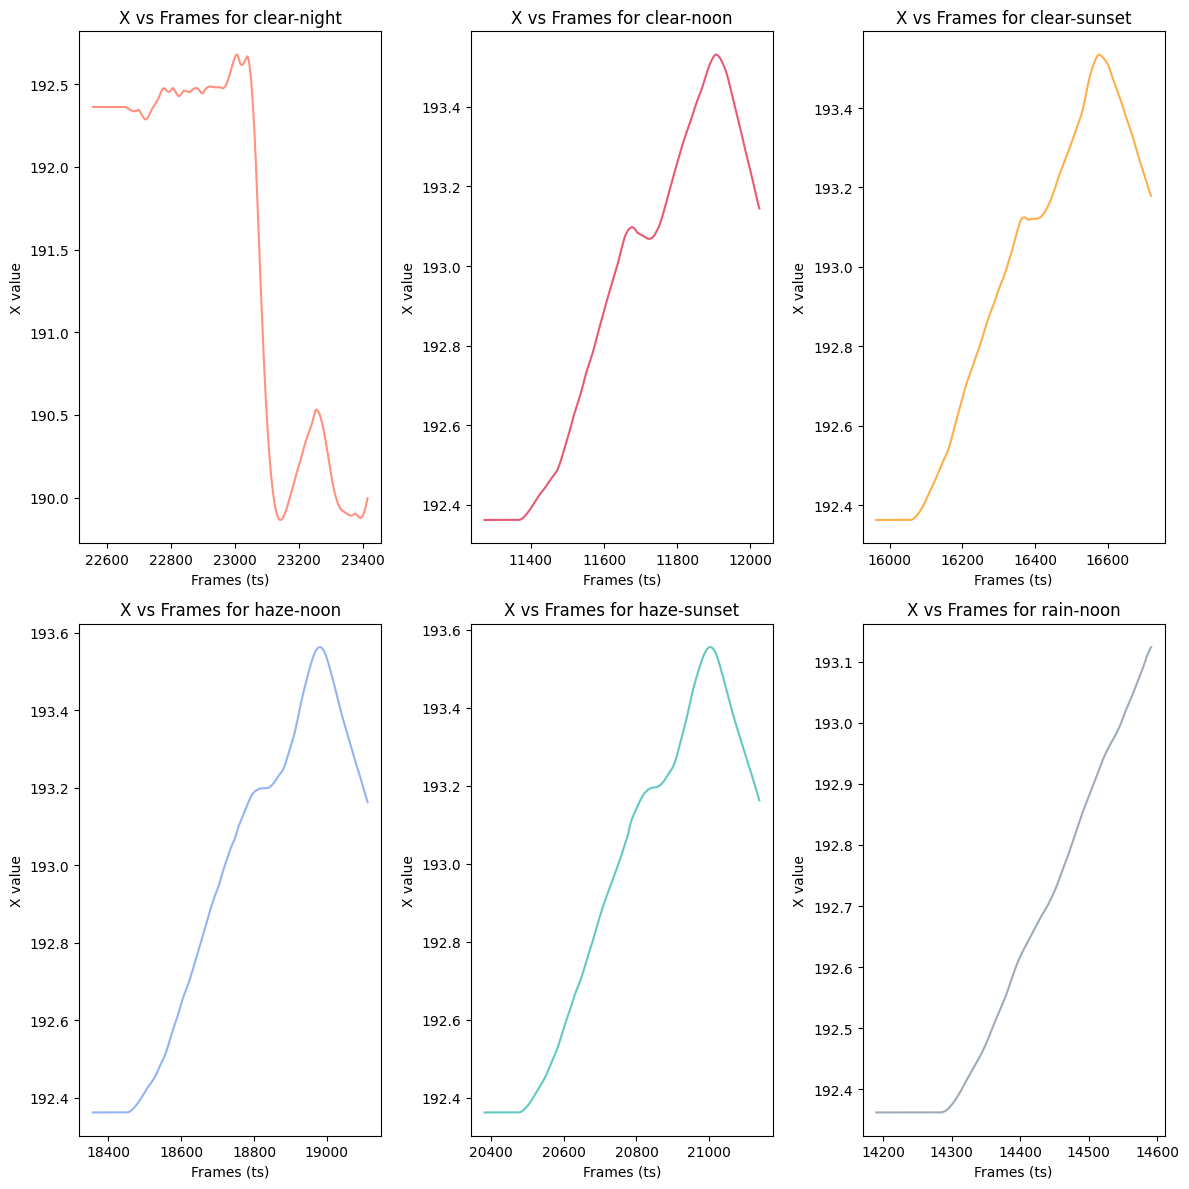

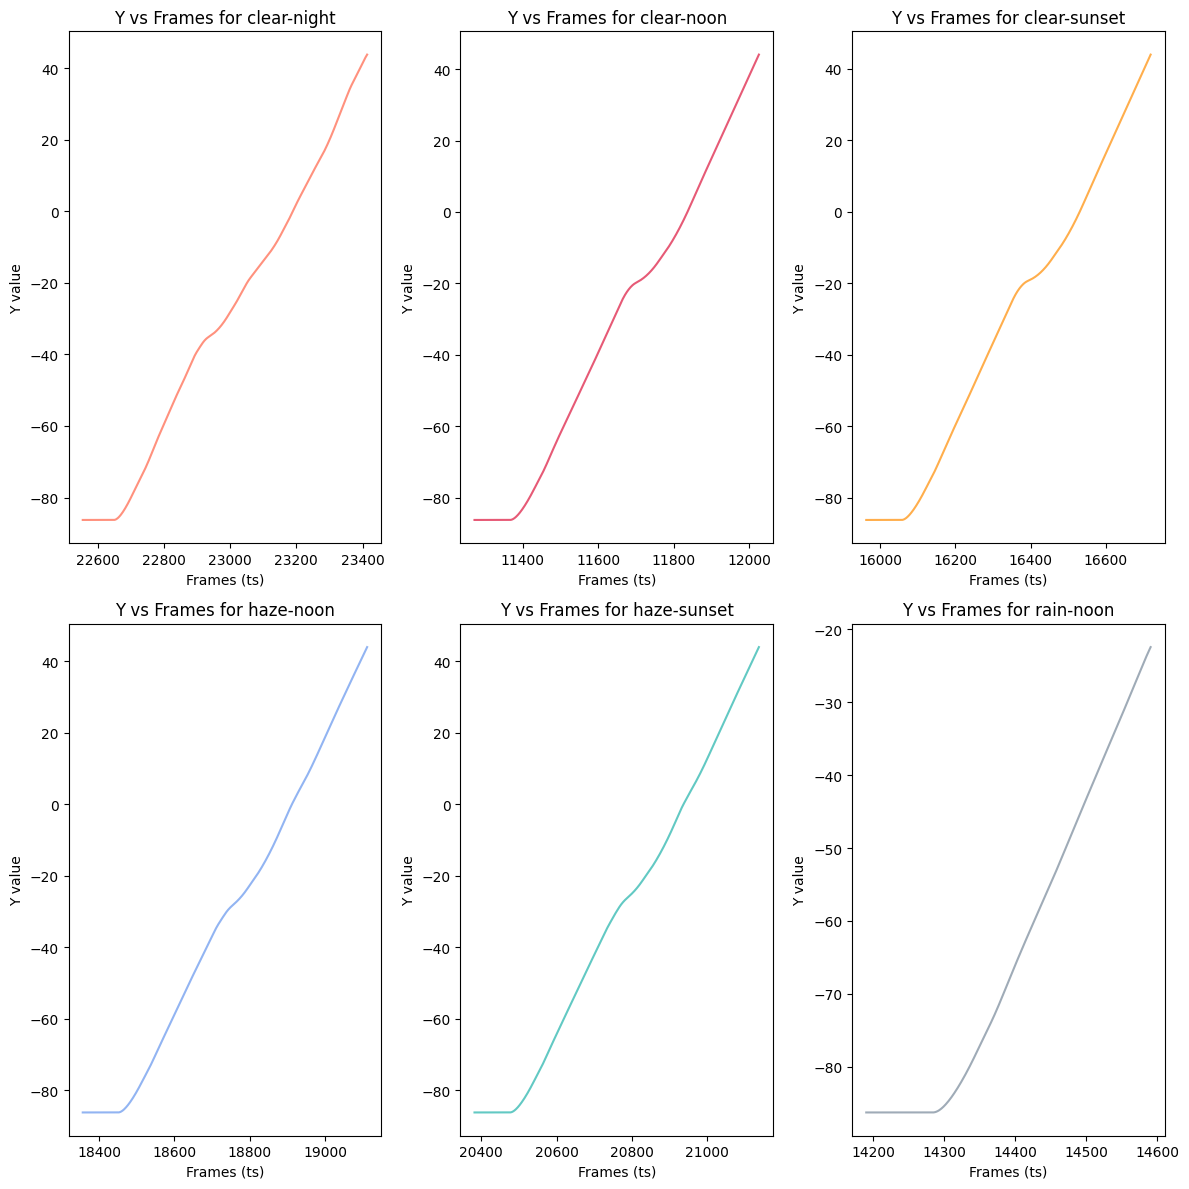

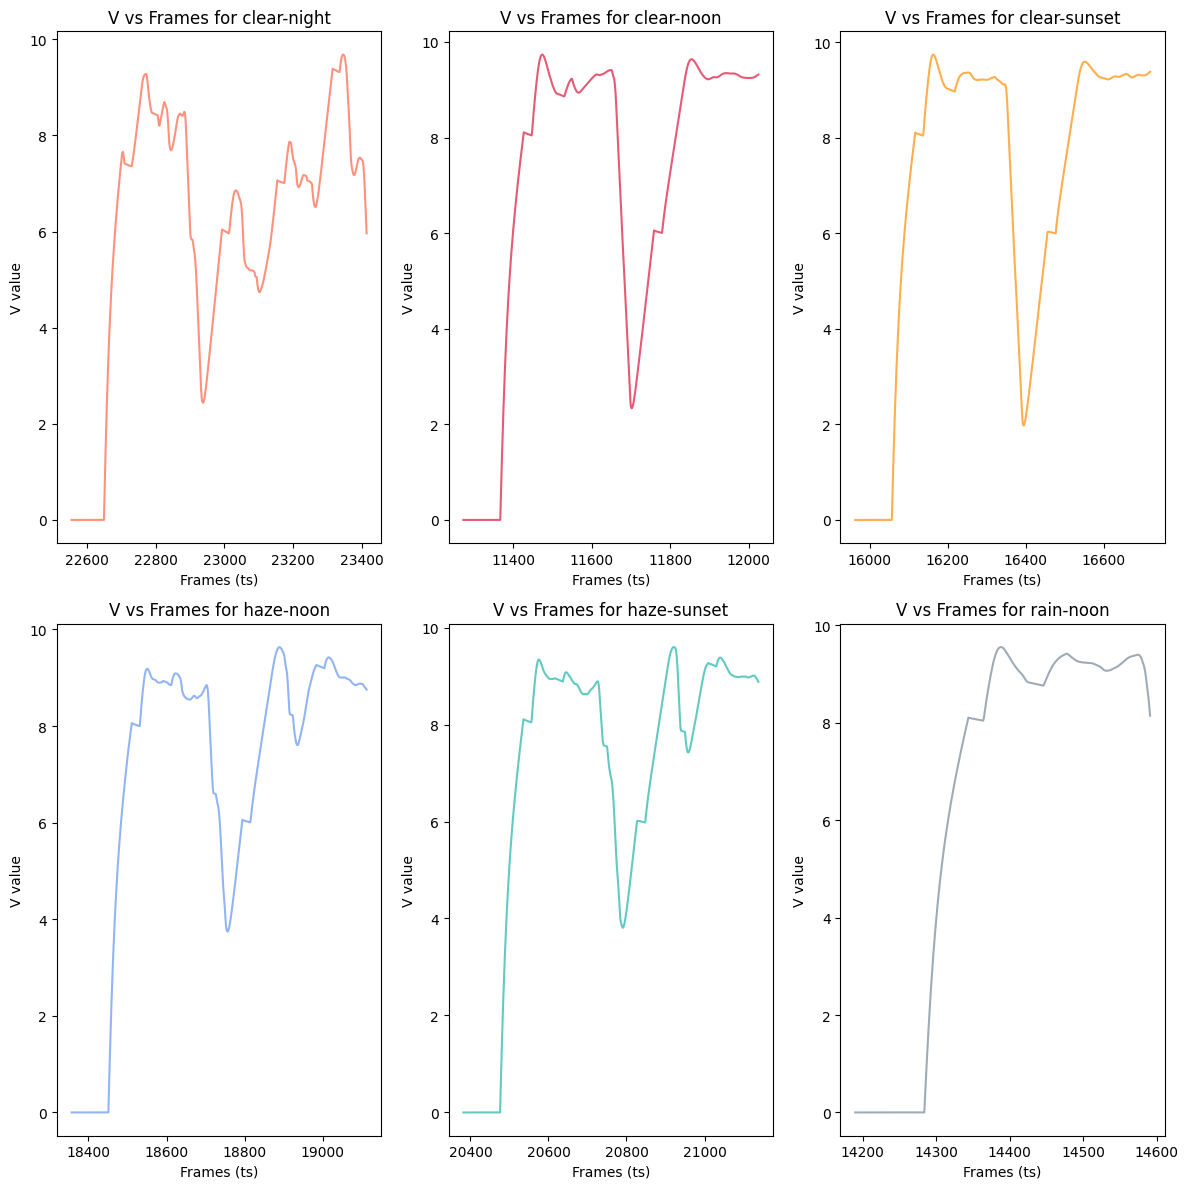

In [34]:
ncols = 3  
nrows = (len(scenarios) + ncols - 1) // ncols  

for feature in features:
    fig, ax = plt.subplots(nrows, ncols, figsize=(12, 6 * nrows))  

    ax = ax.flatten()  
    for i, (scenario, color) in enumerate(zip(scenarios, colors)):
        df = None  
        for file_type in csvs:
            key = f"{scenario}_{file_type}"  
            df = dfs.get(key)  
            if df is not None and feature in df.columns:
                ax[i].plot(df['ts'], df[feature], label=scenario, color=color, alpha=0.7)
                ax[i].set_title(f"{feature.capitalize()} vs Frames for {scenario}")
                ax[i].set_xlabel("Frames (ts)")  
                ax[i].set_ylabel(f"{feature.capitalize()} value")
                # ax[i].legend(loc='lower right')

    for j in range(i + 1, len(ax)):
        fig.delaxes(ax[j])

    plt.tight_layout()  
    plt.show()

##### Turn txt files into a dataframe first

In [35]:
# Function to read the route_highway.txt file
def read_route_highway_txt(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)
        # Extract necessary fields from JSON-like data
        return {
            'duration_game': data['_checkpoint']['records'][0]['meta']['duration_game'],
            'duration_system': data['_checkpoint']['records'][0]['meta']['duration_system'],
            'route_length': data['_checkpoint']['records'][0]['meta']['route_length'],
            'score_composed': data['_checkpoint']['records'][0]['scores']['score_composed'],
            'score_penalty': data['_checkpoint']['records'][0]['scores']['score_penalty'],
            'score_route': data['_checkpoint']['records'][0]['scores']['score_route'],
            'status': data['_checkpoint']['records'][0]['status']
        }

# Function to read CSV files
def read_csv_file(file_path):
    return pd.read_csv(file_path)

In [36]:
df_list = []

In [37]:
merged_csv_df = []
df_list = []  # Initialize the df_list to store all the DataFrames

for scenario in scenarios:
    folder_path = os.path.join(data_dir, f'route_highway_epoch24_{scenario}_fi_ghost_cutin')
    files_in_folder = os.listdir(folder_path)
    print(f"Files in folder {folder_path}: {files_in_folder}")

    # Read the route_highway.txt file
    route_highway_txt_path = os.path.join(folder_path, 'route_highway.txt')

    if os.path.exists(route_highway_txt_path):
        route_highway_data = read_route_highway_txt(route_highway_txt_path)
        route_highway_df = pd.DataFrame([route_highway_data])
    else:
        print(f"route_highway.txt not found in {folder_path}")
        continue  # Skip to the next scenario if the file is not found

    # Concatenate the route_highway_df with merged_csv_df
    full_df = pd.concat([pd.DataFrame(merged_csv_df), pd.concat([route_highway_df], ignore_index=True)], axis=1)
    full_df['scenario'] = scenario
    df_list.append(full_df)

# After the loop, you can concatenate all dataframes in df_list if needed
final_df = pd.concat(df_list, ignore_index=True)

# Combine all scenario data into one dataframe
if df_list:
    final_df = pd.concat(df_list, ignore_index=True)
else:
    print("No valid dataframes were created.")

Files in folder c:\Users\cindy\Desktop\Mini-Project-1-Safety-Analysis-of-Autonomous-Vehicles\simulation_results\route_highway_epoch24_clear-night_fi_ghost_cutin: ['routes_fi_route_highway-0915_005809-data_fi_ghost_cutin-single_ctl.csv', 'routes_fi_route_highway-0915_005809-data_fi_ghost_cutin-single_cvip.csv', 'routes_fi_route_highway-0915_005809-data_fi_ghost_cutin-single_traj.csv', 'route_highway.txt', 'run.done']
Files in folder c:\Users\cindy\Desktop\Mini-Project-1-Safety-Analysis-of-Autonomous-Vehicles\simulation_results\route_highway_epoch24_clear-noon_fi_ghost_cutin: ['routes_fi_route_highway-0915_005230-data_fi_ghost_cutin-single_ctl.csv', 'routes_fi_route_highway-0915_005230-data_fi_ghost_cutin-single_cvip.csv', 'routes_fi_route_highway-0915_005230-data_fi_ghost_cutin-single_traj.csv', 'route_highway.txt', 'run.done']
Files in folder c:\Users\cindy\Desktop\Mini-Project-1-Safety-Analysis-of-Autonomous-Vehicles\simulation_results\route_highway_epoch24_clear-sunset_fi_ghost_cutin

In [38]:
final_df

,duration_game,duration_system,route_length,score_composed,score_penalty,score_route,status,scenario
0,21.500,73.414752,131.560126,100.000000,1.0,100.000000,Completed,clear-night
1,18.825,50.166125,131.560126,100.000000,1.0,100.000000,Completed,clear-noon
2,18.925,57.947956,131.560126,100.000000,1.0,100.000000,Completed,clear-sunset
3,18.900,56.421508,131.560126,100.000000,1.0,100.000000,Completed,haze-noon
4,18.925,59.526863,131.560126,100.000000,1.0,100.000000,Completed,haze-sunset
5,10.050,30.403680,131.560126,28.898348,0.6,48.163914,Failed,rain-noon


##### Task 2.1

In [39]:
# Suppose each simulation run has a result of accident/non-accident, calculate the probability of accident (counts, marginal probability).
# Count the number of accidents ('Failed') and total runs
accident_count = final_df[final_df['status'] == 'Failed'].shape[0]
total_runs = final_df.shape[0]

# Calculate the probability of an accident
probability_of_accident = accident_count / total_runs

# Display the results
print(f"Total runs: {total_runs}")
print(f"Accidents: {accident_count}")
print(f"Probability of accident: {probability_of_accident:.4f}")

Total runs: 6
Accidents: 1
Probability of accident: 0.1667


##### Task 2.2

##### Task 2.4

In [40]:
# Iterate over each scenario
df_list = []
for scenario in scenarios:
    folder_path = os.path.join(data_dir, f'route_highway_epoch24_{scenario}_fi_ghost_cutin')
    files_in_folder = os.listdir(folder_path)
    print(f"Files in folder {folder_path}: {files_in_folder}")

    # Read the route_highway.txt file
    route_highway_txt_path = os.path.join(folder_path, 'route_highway.txt')

    if os.path.exists(route_highway_txt_path):
        route_highway_data = read_route_highway_txt(route_highway_txt_path)
        route_highway_df = pd.DataFrame([route_highway_data])
    else:
        print(f"route_highway.txt not found in {folder_path}")
        continue

    # Initialize an empty dictionary to hold CSV data for each scenario
    csv_data_dict = {}
    # Read the CSV files (ctl, cvip, traj)
    for csv_type in csvs:
        matching_files = [f for f in files_in_folder if f.endswith(f'single_{csv_type}.csv')]
        if matching_files:
            csv_file_path = os.path.join(folder_path, matching_files[0])
            csv_df = read_csv_file(csv_file_path)
            csv_data_dict[csv_type] = csv_df
        else:
            print(f"No file ending with 'single_{csv_type}.csv' found in {folder_path}")

    # Merge CSV dataframes on 'ts','agent_id' column
    if 'ctl' in csv_data_dict:
        merged_csv_df = csv_data_dict['ctl']
        for csv_type in ['cvip', 'traj']:
            if csv_type in csv_data_dict:
                merged_csv_df = pd.merge(merged_csv_df, csv_data_dict[csv_type], on=['ts','agent_id'], how='left')

        # Concatenate the route_highway data to match the length of merged CSV dataframe
        data_df = pd.concat([merged_csv_df, pd.concat([route_highway_df]*len(merged_csv_df), ignore_index=True)], axis=1)
        data_df['scenario'] = scenario
        df_list.append(data_df)

# Combine all scenario data into one dataframe
if df_list:
    data_df = pd.concat(df_list, ignore_index=True)
else:
    print("No valid dataframes were created.")

Files in folder c:\Users\cindy\Desktop\Mini-Project-1-Safety-Analysis-of-Autonomous-Vehicles\simulation_results\route_highway_epoch24_clear-night_fi_ghost_cutin: ['routes_fi_route_highway-0915_005809-data_fi_ghost_cutin-single_ctl.csv', 'routes_fi_route_highway-0915_005809-data_fi_ghost_cutin-single_cvip.csv', 'routes_fi_route_highway-0915_005809-data_fi_ghost_cutin-single_traj.csv', 'route_highway.txt', 'run.done']
Files in folder c:\Users\cindy\Desktop\Mini-Project-1-Safety-Analysis-of-Autonomous-Vehicles\simulation_results\route_highway_epoch24_clear-noon_fi_ghost_cutin: ['routes_fi_route_highway-0915_005230-data_fi_ghost_cutin-single_ctl.csv', 'routes_fi_route_highway-0915_005230-data_fi_ghost_cutin-single_cvip.csv', 'routes_fi_route_highway-0915_005230-data_fi_ghost_cutin-single_traj.csv', 'route_highway.txt', 'run.done']
Files in folder c:\Users\cindy\Desktop\Mini-Project-1-Safety-Analysis-of-Autonomous-Vehicles\simulation_results\route_highway_epoch24_clear-sunset_fi_ghost_cutin

In [41]:
data_df

,ts,agent_id,throttle,steer,brake,cvip,cvip_x,cvip_y,cvip_z,x,...,z,v,duration_game,duration_system,route_length,score_composed,score_penalty,score_route,status,scenario
0,22555,0,0.9,-0.012952,0.0,500.491189,198.767441,-95.832657,-499.819366,192.362411,...,0.539326,0.000000,21.50,73.414752,131.560126,100.000000,1.0,100.000000,Completed,clear-night
1,22556,0,0.9,-0.003071,0.0,5.595580,195.567444,-90.832657,0.100000,192.362411,...,0.491906,0.000000,21.50,73.414752,131.560126,100.000000,1.0,100.000000,Completed,clear-night
2,22557,0,0.9,-0.010238,0.0,5.592365,195.567444,-90.832657,0.095407,192.362411,...,0.438374,0.000000,21.50,73.414752,131.560126,100.000000,1.0,100.000000,Completed,clear-night
3,22558,0,0.9,-0.008100,0.0,5.589578,195.567444,-90.832657,0.084691,192.362411,...,0.378732,0.000000,21.50,73.414752,131.560126,100.000000,1.0,100.000000,Completed,clear-night
4,22559,0,0.9,-0.000104,0.0,5.587154,195.567444,-90.832657,0.069311,192.362411,...,0.312981,0.000000,21.50,73.414752,131.560126,100.000000,1.0,100.000000,Completed,clear-night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4280,14587,0,0.0,0.004804,1.0,3.886337,195.094452,-19.930393,0.001773,193.114700,...,0.034340,8.722205,10.05,30.403680,131.560126,28.898348,0.6,48.163914,Failed,rain-noon
4281,14588,0,0.0,0.007235,1.0,3.934861,195.006317,-19.606899,0.001775,193.117157,...,0.034419,8.617002,10.05,30.403680,131.560126,28.898348,0.6,48.163914,Failed,rain-noon
4282,14589,0,0.0,0.008096,1.0,3.990314,194.917572,-19.283451,0.001779,193.119522,...,0.034498,8.483720,10.05,30.403680,131.560126,28.898348,0.6,48.163914,Failed,rain-noon
4283,14590,0,0.0,0.006072,1.0,4.053206,194.828323,-18.960222,0.001786,193.121735,...,0.034587,8.324382,10.05,30.403680,131.560126,28.898348,0.6,48.163914,Failed,rain-noon


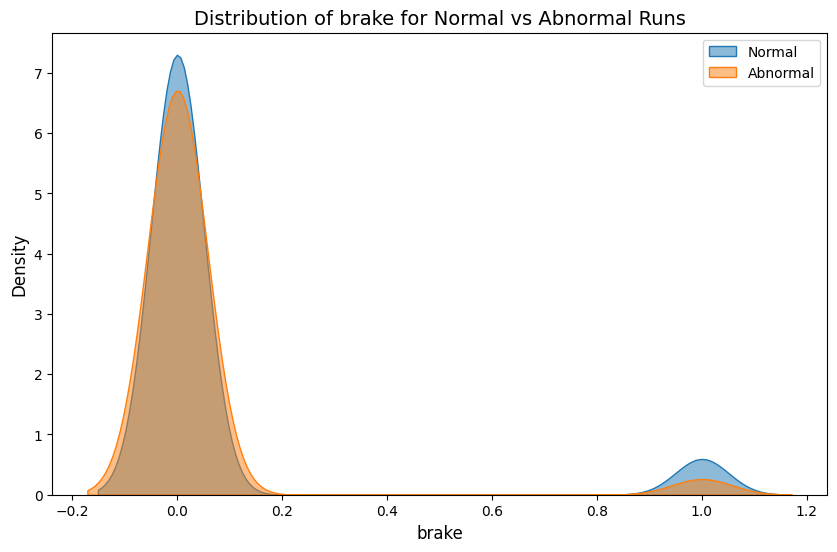

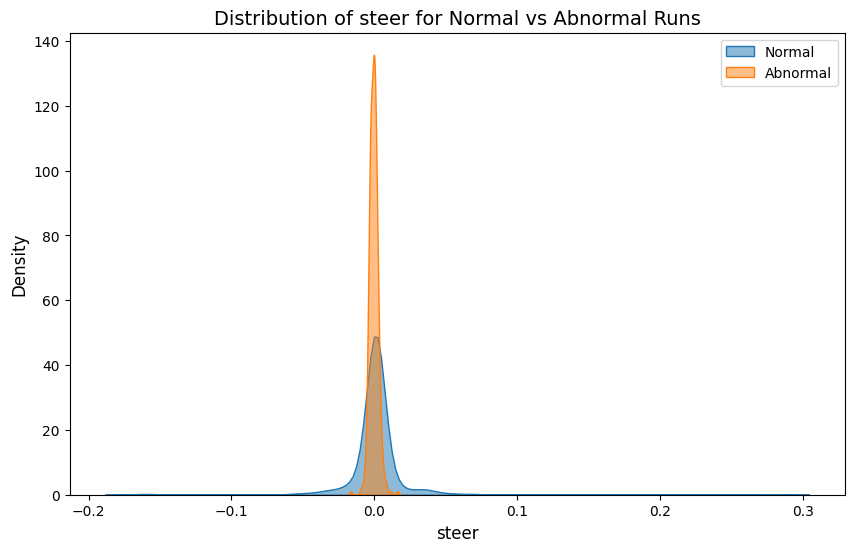

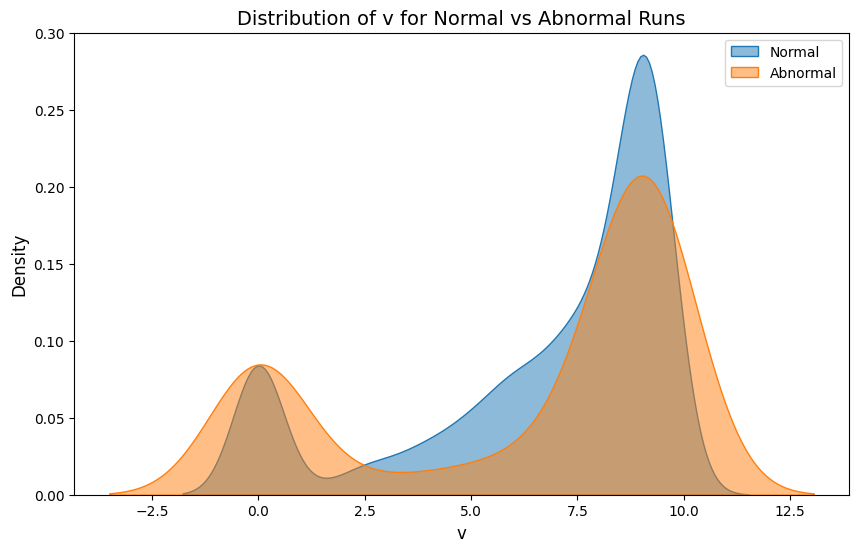

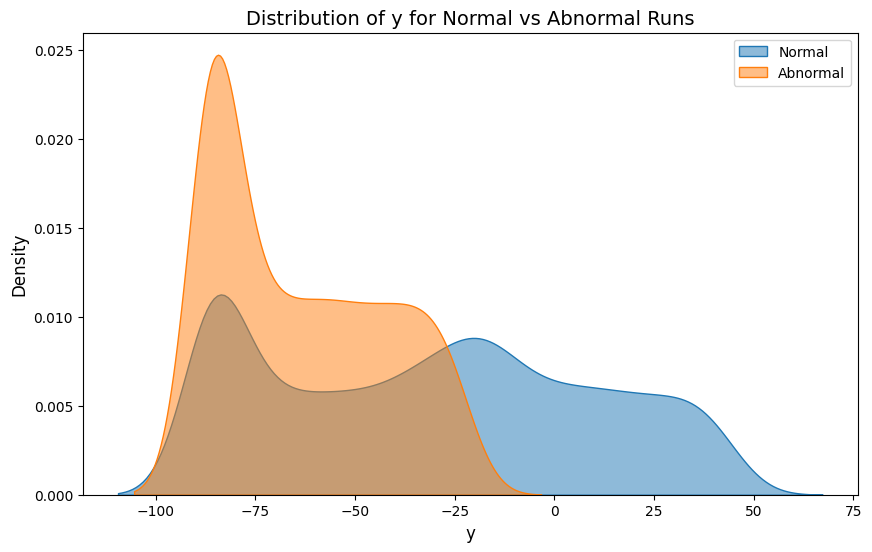

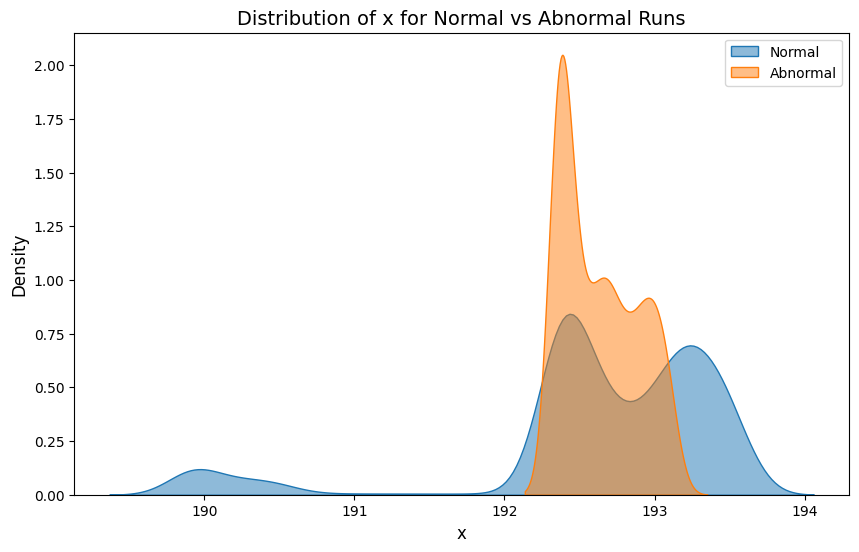

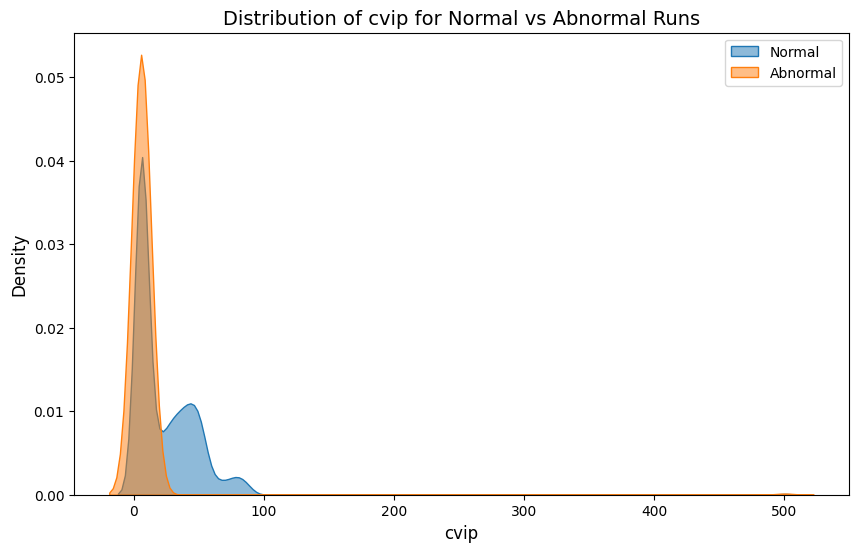

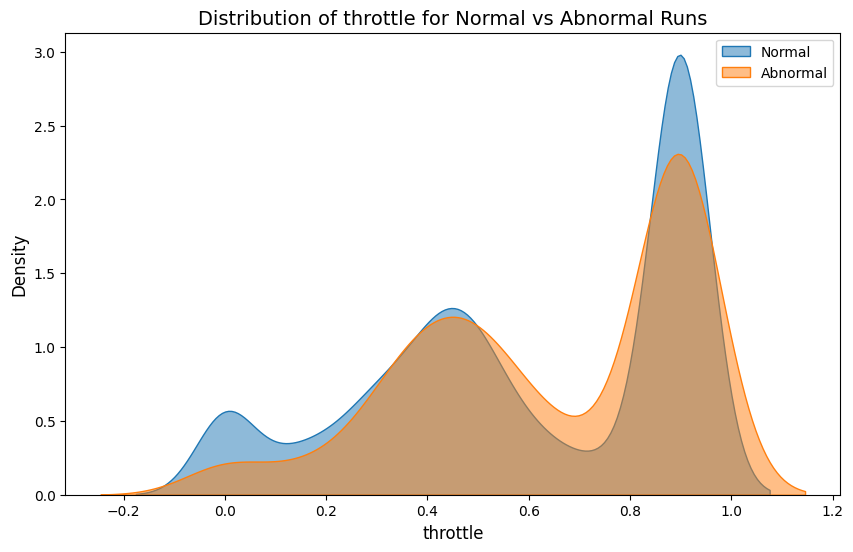

In [42]:
# a. We study the following features: “brake”, “steer”, “v”, “y”, “x”, “cvip”, “throttle”. Plot the distribution of each feature for the abnormal runs (including the accident runs) vs normal runs. Treat the values at each time point as an independent individual sample and generate the density plot of the distribution. Describe the difference between the “steer” distribution for normal and abnormal runs.
# Classify runs as normal or abnormal based on the 'status' field
data_df['run_type'] = data_df['status'].apply(lambda x: 'Normal' if x == 'Completed' else 'Abnormal')

# List of features to analyze
features = ['brake', 'steer', 'v', 'y', 'x', 'cvip', 'throttle']

# Plot distribution for each feature
for feature in features:
    plt.figure(figsize=(10, 6))
    
    # Generate density plot for normal and abnormal runs
    sns.kdeplot(data=data_df[data_df['run_type'] == 'Normal'], x=feature, label='Normal', fill=True, alpha=0.5)
    sns.kdeplot(data=data_df[data_df['run_type'] == 'Abnormal'], x=feature, label='Abnormal', fill=True, alpha=0.5)
    
    # Add title and labels
    plt.title(f'Distribution of {feature} for Normal vs Abnormal Runs', fontsize=14)
    plt.xlabel(f'{feature}', fontsize=12)
    plt.ylabel('Density', fontsize=12)
    plt.legend()
    
    # Show the plot
    plt.show()

##### i. 
Null Hypothesis (H₀): The mean of the *`steer`* values for abnormal runs is equal to the mean of the *`steer`* values for normal runs.\
𝐻0: 𝜇 abnormal = 𝜇 normal

Alternative Hypothesis (H₁): The mean of the *`steer`* values for abnormal runs is different from the mean of the *`steer`* values for normal runs.\
𝐻1: 𝜇 abnormal ≠ 𝜇 normal
##### ii. 
We use Levene's test to check whether the variances between two groups of data (normal and abnormal steer values) are equal. Checking the equality of variances is important before performing a t-test, as it determines which version of the t-test should be used. It is a robust test for equality of variances and works well even when the data is not normally distributed.
* `Levene's test result`: Based on the result (Statistic: 38.9101, p-value: 0.0000), we chose Welch's t-test for further analysis.
* `T-Test (Welch's T-test) result`: T-test statistic: 3.9279, p-value: 0.0001
##### iii. 
Based on the results of both the Levene’s test and Welch’s t-test, we conclude that the steering behavior (steer values) during abnormal runs is significantly different from that during normal runs. This difference is statistically significant at the 0.05 significance level.

In [43]:
# b.
# Classify runs as normal or abnormal based on the 'status' field
data_df['run_type'] = data_df['status'].apply(lambda x: 'Normal' if x == 'Completed' else 'Abnormal')

# Separate steer values for normal and abnormal runs
normal_steer = data_df[data_df['run_type'] == 'Normal']['steer']
abnormal_steer = data_df[data_df['run_type'] == 'Abnormal']['steer']

# Remove NaN or infinite values from both normal and abnormal steer values
normal_steer = normal_steer.dropna()
abnormal_steer = abnormal_steer.dropna()

# Check for infinite values (inf)
normal_steer = normal_steer[~normal_steer.isin([float('inf'), float('-inf')])]
abnormal_steer = abnormal_steer[~abnormal_steer.isin([float('inf'), float('-inf')])]

# Step 1: Test for equal variances using Levene’s test
stat, p_value_var = stats.levene(normal_steer, abnormal_steer)

print(f'Levene’s test statistic: {stat:.4f}, p-value: {p_value_var:.4f}')

# Step 2: Perform the appropriate t-test based on the result of Levene’s test
if p_value_var > 0.05:
    # Variances are equal, use the standard 2-sample t-test (pooled variance)
    t_stat, p_value_t = stats.ttest_ind(normal_steer, abnormal_steer, equal_var=True)
else:
    # Variances are not equal, use Welch's t-test (unequal variances)
    t_stat, p_value_t = stats.ttest_ind(normal_steer, abnormal_steer, equal_var=False)

print(f'T-test statistic: {t_stat:.4f}, p-value: {p_value_t:.4f}')

Levene’s test statistic: 38.9101, p-value: 0.0000
T-test statistic: 3.9279, p-value: 0.0001


##### Task2.5

In [44]:
# b.
selected = data_df[['steer', 'cvip', 'v']]
correlation_matrix = selected.corr()
correlation_matrix

,steer,cvip,v
steer,1.00000,-0.055790,-0.067020
cvip,-0.05579,1.000000,0.192049
v,-0.06702,0.192049,1.000000


##### Task2.6

In [45]:
# b. Perform the KS two-sample test and calculate its statistics.
features = ['steer', 'cvip', 'v']

for feature in features:
    normal_values = data_df[data_df['status'] == 'Completed'][feature]
    abnormal_values = data_df[data_df['status'] == 'Failed'][feature]

    ks_statistic, p_value = stats.ks_2samp(normal_values, abnormal_values)

    print(f"Feature: {feature}")
    print(f"KS Statistic: {ks_statistic}")
    print(f"P-value: {p_value}")
    print("-" * 30) 

Feature: steer
KS Statistic: 0.2515897207242182
P-value: 8.688338501408107e-21
------------------------------
Feature: cvip
KS Statistic: 0.4971261385577905
P-value: 3.10976451114154e-83
------------------------------
Feature: v
KS Statistic: 0.1586626486419307
P-value: 1.7749121381144363e-08
------------------------------


In [46]:
# d. Repeat the same test on a feature that you did not select as an indicator of abnormal behavior in Task 2.5. What is your conclusion?
features_nselected = ['brake', 'y', 'x', 'throttle']

for feature in features_nselected:
    normal_values = data_df[data_df['status'] == 'Completed'][feature]
    abnormal_values = data_df[data_df['status'] == 'Failed'][feature]

    ks_statistic, p_value = stats.ks_2samp(normal_values, abnormal_values)

    print(f"Feature: {feature}")
    print(f"KS Statistic: {ks_statistic}")
    print(f"P-value: {p_value}")
    print("-" * 30) 

Feature: brake
KS Statistic: 0.03788615511164241
P-value: 0.6568338436895799
------------------------------
Feature: y
KS Statistic: 0.44038114859644606
P-value: 1.417233757506496e-64
------------------------------
Feature: x
KS Statistic: 0.3340258532216589
P-value: 1.1603455336028183e-36
------------------------------
Feature: throttle
KS Statistic: 0.08918708030796314
P-value: 0.005668926725610916
------------------------------


##### Task2.8